# Summer Project 2019

This is basically a simulation study. I will break it up in small scale and large scale simulations.


### Small Scale Simulation (Assymptotic Test from the Proposed Paper) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pylab import *

##### Trial Box

In [20]:
np.random.gamma(7,8,10)

array([ 62.52484535,  51.92400822,  77.58478656,  47.8536296 ,
        48.71571835,  30.44067471,  56.84266538,  81.40586886,
       105.23374403,  56.85793171])

In [4]:
15**4

50625

In [5]:
math.gamma(5.2)

32.578096050331354

In [3]:
def Test(r,n,l,k):
    m=0
    for j in range(1,k):
        x = np.random.exponential(l,n)
        z=0
        q=0
        for i in range(1,n):
            z=z+ exp(-0.5*((x[i]*(n**0.30))**2))
            q=q+(x[i]**r)
        z=z/((2*3.14*n)**0.5)
        q=q/n
        y= np.mean(x)
        g= math.gamma(r+1)
        s = (g/((y*z)**r))- (q/(y**r))
        zeta = (s/r*g)*(((2/y)*((n*3.14)**0.5))**0.5)
        if zeta>1.64:
            m=m+1
        else:
            m=m
    m=(m/k)*100
    return(m)
    

In [15]:
Test(3,200,9,1000)

19.8

In [4]:
def Test2(r,a,b,l,k):
    m = 0
    for j in range(1,k):
        x = np.random.exponential(l,a)
        z=0
        q=0
        for i in range(1,a):
            z=z+ exp(-0.5*((x[i]*(a**0.30))**2))
            q=q+(x[i]**r)
        z=z/((2*3.14*a)**0.5)
        q=q/a
        mean_1= np.mean(x)
        g= math.gamma(r+1)
        s_1 = (g/((mean_1*z)**r))- (q/(mean_1**r))
        y = np.random.exponential(l,b)
        z = 0
        q = 0
        for i in range(1,b):
            z=z+ exp(-0.5*((y[i]*(b**0.30))**2))
            q=q+(y[i]**r)
        z=z/((2*3.14*b)**0.5)
        q=q/b
        mean_2= np.mean(y)
        g= math.gamma(r+1)
        s_2 = (g/((mean_2*z)**r))- (q/(mean_2**r))
        
        c= ((a/b)**(1.3/2))
        T = c*(s_1/s_2)
        if(T>6.314):
            m=m+1
        else:
            m=m
    m=(m/k)*100
    return(m)
    

In [5]:
Test2(4,150,50,9,1000)

10.5

In [7]:
def Kernelf(n,d,l):
    x = np.random.exponential(n,l)
    z=0
    for i in range(1,n):
        z=z+ exp((-x[i]*(n**(d+0.4)))**2)
    z = z/(((2*3.14)**0.5)*(n**(0.8-d)))
    q = 0
    for i in range(1,n):
        q=q+ exp((-(0.005-x[i])*(n**(d+0.4)))**2)
    q = q/(((2*3.14)**0.5)*(n**(0.8-d)))
    p = (log(q) - log(z))/0.005    

In [8]:
Kernelf(100,0.5,7)

IndexError: index 7 is out of bounds for axis 0 with size 7

## Comparison Study:

### Parameter = 7, Number of data point variable , h_n = n^-.3 , r =3


In [48]:
seq = np.array(range(31))
seq_a = 20*seq
seq_b = 10*seq
seq_main = 30*seq

seq_a[30]
seq_b[30]
seq_main[30]

900

In [49]:
test_1_results = np.zeros(30)
test_2_results = np.zeros(30)
test_1_results[29]

0.0

In [52]:
for i in range(1,30):
    test_1_results[i-1] = Test(3,seq_main[i],7,1000)
    test_2_results[i-1] = Test2(3,seq_a[i],seq_b[i],7,1000)
test_1_results

array([63. , 49.9, 39.6, 33.6, 26.7, 19.3, 15.8, 14.1, 11. , 11.3,  7.3,
        6.5,  4.8,  4.7,  3.5,  2.9,  2.7,  2. ,  1.9,  1.7,  0.9,  1.1,
        0.7,  0.9,  0.4,  0.5,  0.2,  0.5,  0.3,  0. ])

In [54]:
test_2_results

array([18. , 13. ,  8.8,  9.3,  7.8,  6.5,  6.8,  6. ,  5.7,  8.1,  5.7,
        4.4,  6.9,  7.4,  6.6,  6.6,  4.3,  7. ,  6.5,  5.4,  5.7,  6.2,
        6.8,  6. ,  5.6,  5.6,  4. ,  5.1,  4.5,  0. ])

In [57]:
sim = np.array([30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690,720,750,780,810,840,870,900])
sim

array([ 30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390,
       420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780,
       810, 840, 870, 900])

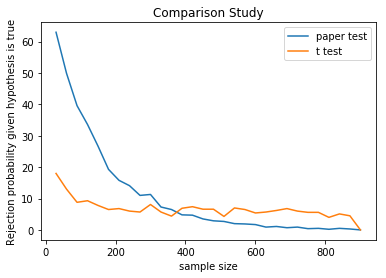

In [64]:
plt.plot(sim , test_1_results, label = "paper test")

plt.plot(sim , test_2_results, label = "t test")
plt.title('Comparison Study')
plt.xlabel('sample size')
plt.ylabel('Rejection probability given hypothesis is true')
plt.legend()
plt.show()


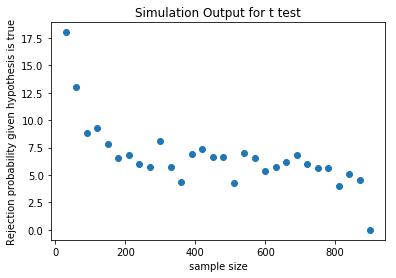

In [65]:
plt.scatter(sim , test_2_results)
plt.title('Simulation Output for t test')
plt.xlabel('sample size')
plt.ylabel('Rejection probability given hypothesis is true')
plt.show()

## Power Comparison against Weibull Alternative:


In [66]:
from scipy.stats import weibull_min

n = 100     # number of samples
k = 2.4     # shape
lam = 5.5   # scale

x = weibull_min.rvs(k, loc=0, scale=lam, size=n)

In [68]:
x

array([ 5.45110324,  7.41987636,  4.23656092,  6.53858547,  5.83648406,
        4.80976078,  2.07586836,  4.42605926,  3.23522574,  6.95897898,
        4.63268797,  5.44531392,  1.88105785,  5.38099273,  5.61007891,
        3.42702863,  3.39328897,  5.77437856,  1.66225925,  6.11978667,
        6.96713734,  6.28907226,  5.77427806,  7.50179027,  2.00332848,
        3.37481654,  5.50217569,  5.54910476,  3.9354995 ,  6.22112073,
        1.45816907,  4.33986745,  5.22524489,  3.07790598,  5.1360139 ,
        3.62344813,  9.19959553,  1.10380037,  2.8390475 ,  8.71570694,
        8.92192856,  4.77384686,  4.2917017 , 10.6596857 ,  3.59188293,
        1.58250629,  5.73578707,  7.40150023,  9.30091453,  3.14443346,
        7.35332523,  5.79072308,  7.99733387,  4.28356316,  6.50089872,
        4.03410546,  4.48432211,  4.09546453,  4.66648256,  5.5752972 ,
        3.29744804,  7.97377671,  3.47985501,  6.25199568,  5.33089836,
        6.0301852 ,  3.68205874,  4.61247275,  5.37658   ,  3.30

In [4]:
def Test3(r,n,l,k):
    m=0
    for j in range(1,k):
        x = np.random.weibull(l,n)
        z=0
        q=0
        for i in range(1,n):
            z=z+ exp(-0.5*((x[i]*(n**0.30))**2))
            q=q+(x[i]**r)
        z=z/((2*3.14*n)**0.5)
        q=q/n
        y= np.mean(x)
        g= math.gamma(r+1)
        s = (g/((y*z)**r))- (q/(y**r))
        zeta = (s/r*g)*(((2/y)*((n*3.14)**0.5))**0.5)
        if zeta>1.64:
            m=m+1
        else:
            m=m
    m=(m/k)*100
    return(m)
    

In [80]:
Test3(4,70,1.5,10000)

99.99

In [5]:
def Test4(r,a,b,l,k):
    m = 0
    for j in range(1,k):
        x = np.random.weibull(l,a)
        z=0
        q=0
        for i in range(1,a):
            z=z+ exp(-0.5*((x[i]*(a**0.30))**2))
            q=q+(x[i]**r)
        z=z/((2*3.14*a)**0.5)
        q=q/a
        mean_1= np.mean(x)
        g= math.gamma(r+1)
        s_1 = (g/((mean_1*z)**r))- (q/(mean_1**r))
        y = np.random.weibull(l,b)
        z = 0
        q = 0
        for i in range(1,b):
            z=z+ exp(-0.5*((y[i]*(b**0.30))**2))
            q=q+(y[i]**r)
        z=z/((2*3.14*b)**0.5)
        q=q/b
        mean_2= np.mean(y)
        g= math.gamma(r+1)
        s_2 = (g/((mean_2*z)**r))- (q/(mean_2**r))
        
        c= ((a/b)**(1.3/2))
        T = c*(s_1/s_2)
        if(T>6.314):
            m=m+1
        else:
            m=m
    
    return(m)
    

In [9]:
Test4(4,100,50,7,1000)

914